<a href="https://colab.research.google.com/github/juandarango/Machine_Learning_Vorlesung/blob/main/Anwendungsfall_1a_CooPick_Good_or_Bad_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Einfache Klassifizierung zwischen Äpfel mit und ohne Defekte

Für das CooPick-Projekt wurde ein einfacher erster Test durchgeführt, um die Unterscheidung zwischen gesunden Äpfeln und Äpfeln mit Oberflächenfehlern zu überprüfen. Damit sollte ein Robotersystem Äpfel mit Defekte erkennen und raussortieren.

Hierfür wurde ein Datensatz mit zwei Ordnern erstellt, einer mit gesunden Äpfeln und der andere mit Äpfeln mit Defekten. Diese befinden sich unter: https://data.ips.biba.uni-bremen.de/Lehre/dsmlpl_SS21/Apples_Defect_Healthy.tgz


In [1]:
! [ -e /content ] && pip install -Uqq fastai 
from fastai.vision.all import *

     |████████████████████████████████| 194kB 6.8MB/s 
     |████████████████████████████████| 61kB 4.9MB/s 
     |████████████████████████████████| 12.8MB 194kB/s 
     |████████████████████████████████| 776.8MB 25kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [3]:
url_photos = 'https://data.ips.biba.uni-bremen.de/Lehre/dsmlpl_SS21/Apples_Defect_Healthy.tgz'
path = untar_data(url_photos)
path.ls()

(#2) [Path('/root/.fastai/data/Apples_Defect_Healthy/Healthy'),Path('/root/.fastai/data/Apples_Defect_Healthy/Defected')]

In [4]:
files = get_image_files(path)
len(files)

837

In [5]:
files[6]

Path('/root/.fastai/data/Apples_Defect_Healthy/Healthy/conv10.jpg')

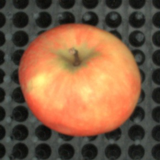

In [6]:
im = PILImage.create(files[6])
im.to_thumb(160)

In [7]:
Apple_DB = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(0.2,seed=7),
                 get_y=parent_label ,
                 item_tfms=Resize(224),
                )

In [8]:
dls = Apple_DB.dataloaders(path)

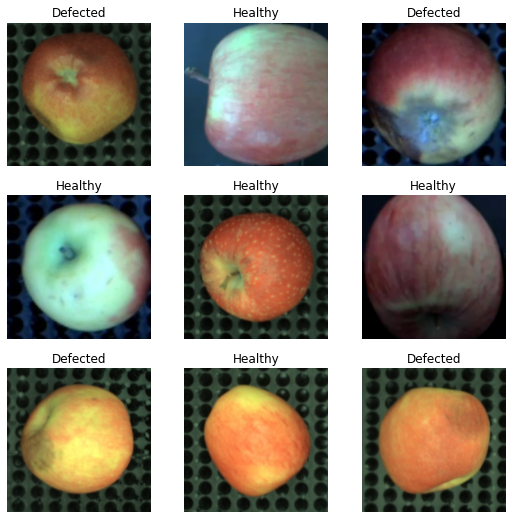

In [9]:
dls.show_batch()

In [10]:
learn = cnn_learner(dls, resnet34, metrics=(error_rate,accuracy))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


SuggestedLRs(lr_min=0.012022644281387329, lr_steep=6.309573450380412e-07)

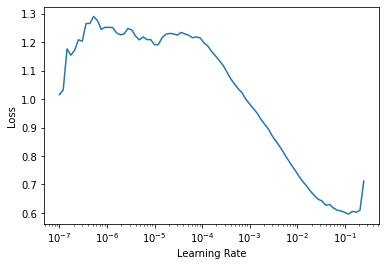

In [11]:
learn.lr_find()

In [12]:
max_lr=2e-3
learn.fine_tune(5,max_lr,2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.879060,0.521841,0.203593,0.796407,00:07
1,0.578612,0.223271,0.095808,0.904192,00:06


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.164125,0.214361,0.065868,0.934132,00:09
1,0.134237,0.116531,0.047904,0.952096,00:08
2,0.110836,0.170683,0.035928,0.964072,00:08
3,0.077893,0.143409,0.047904,0.952096,00:08
4,0.061189,0.160184,0.053892,0.946108,00:08


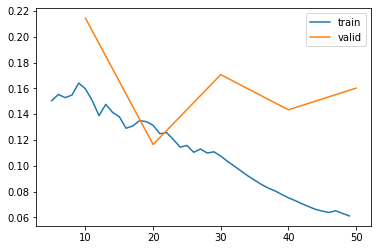

In [13]:
learn.recorder.plot_loss()

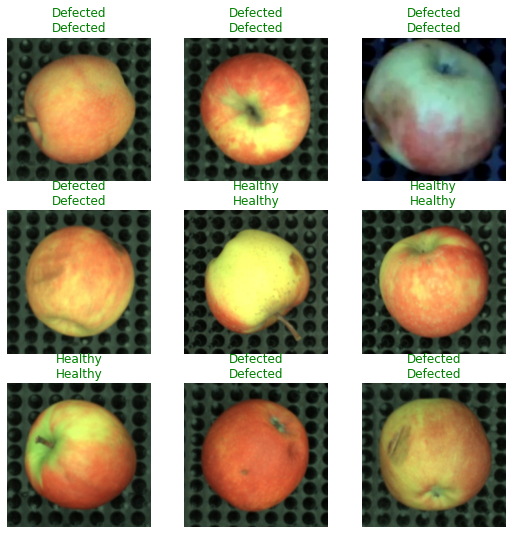

In [14]:
learn.show_results()

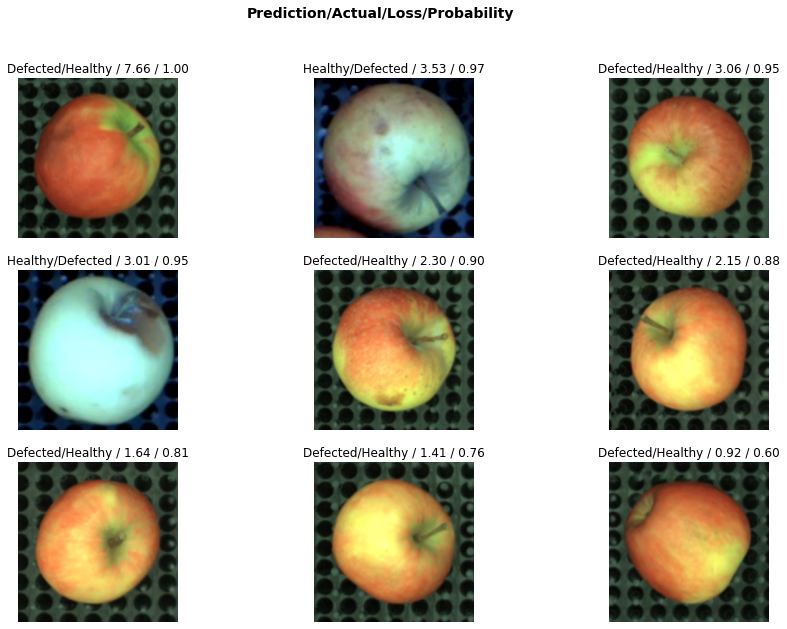

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

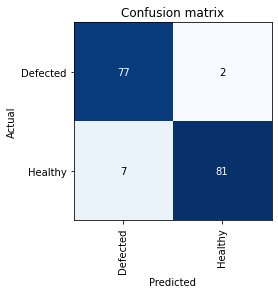

In [16]:
interp.plot_confusion_matrix()